# 🎯 **Project Overview**  
Dalam proyek ini, kita akan melakukan **web scraping** untuk mengambil **ulasan pengguna** dari aplikasi **Programming Hub: Learn to code** di Google Play Store. 

## 🔧 **Libraries Used**

In [1]:
from google_play_scraper import reviews, Sort, app

# Data & Visualisasi
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# NLP dan Preprocessing
import nltk
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import contractions
import re
import unicodedata
import spacy

# Model dan Vektorisasi
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# WordCloud
from wordcloud import WordCloud

# Utility
from collections import Counter

## 🏁 **Tahapan Proyek**  

### 1️⃣  **Scraping Data** → Mengambil ulasan aplikasi menggunakan `google_play_scraper`

In [2]:
info = app('com.freeit.java')  # ID aplikasi programming_hub
print("Versi terbaru:", info['version'])

Versi terbaru: 5.2.40


In [3]:
# Ambil 1000 review terbaru
result, _ = reviews(
    'com.freeit.java',
    lang='en',
    count=1000,
    sort=Sort.NEWEST
)

# Simpan ke dalam variabel filtered_reviews agar tetap kompatibel
filtered_reviews = result

In [4]:
# Simpan hasil filter ke dalam DataFrame
df = pd.DataFrame(filtered_reviews)
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,a81da45e-af43-4ce4-91ae-00513fcc458c,Sipho Mabila,https://play-lh.googleusercontent.com/a/ACg8oc...,amazing,5,0,5.2.40,2025-06-17 19:56:02,"Thank you, Sipho! We're thrilled you find Prog...",2025-06-17 20:00:04,5.2.40
1,322cce1e-c05f-460f-976e-1cf6f402e739,Lucas Karshner,https://play-lh.googleusercontent.com/a-/ALV-U...,just getting started. but the interface is eas...,4,0,5.2.40,2025-06-17 18:47:57,Hi Lucas! Thank you for your positive feedback...,2025-06-17 18:50:08,5.2.40
2,c17e6af9-110c-40ec-b9a4-25f5a3d666ca,Ashish Kumar Sinha,https://play-lh.googleusercontent.com/a-/ALV-U...,i bought the pro version for lifetime subscrip...,1,0,5.2.40,2025-06-17 18:16:05,"Hi Ashish, I'm sorry for the inconvenience. Yo...",2025-06-17 18:20:03,5.2.40
3,6450cf3a-726b-47f6-b60e-f4ac33561525,Sidian -P,https://play-lh.googleusercontent.com/a/ACg8oc...,This app is good but I recomend running every ...,2,0,5.2.40,2025-06-17 17:24:13,"Hi Sidian-P, thank you for your feedback. We'l...",2025-06-17 17:25:03,5.2.40
4,affbf311-fbe4-4a23-8797-12200f6d3249,Arjun Thapa,https://play-lh.googleusercontent.com/a/ACg8oc...,it very useful app plz download this app and l...,5,0,5.2.40,2025-06-17 14:57:49,"Thank you, Arjun Thapa! We're glad you find Pr...",2025-06-17 15:00:03,5.2.40
...,...,...,...,...,...,...,...,...,...,...,...
995,a8fe0689-2637-4689-994d-11ec1925c978,Anshu Kumar,https://play-lh.googleusercontent.com/a/ACg8oc...,best app for learning frr,5,0,5.2.38,2025-03-04 00:34:11,"Thank you, Anshu Kumar! We're thrilled to hear...",2025-03-04 00:35:07,5.2.38
996,f0066280-a36e-455d-8a88-28bad2805ee4,Kwanele Shusha,https://play-lh.googleusercontent.com/a/ACg8oc...,haven't learned much but i get the basics from...,5,0,5.2.38,2025-03-03 23:44:15,"Thank you, Kwanele Shusha! We're glad to hear ...",2025-03-03 23:45:03,5.2.38
997,3499fe74-13e7-4bc8-82af-6055303edf32,Abhishek Singh,https://play-lh.googleusercontent.com/a-/ALV-U...,Very helpful app to learn about computer files...,5,0,5.2.38,2025-03-03 23:35:22,"Thank you, Abhishek Singh, for your kind words...",2025-03-03 23:40:03,5.2.38
998,1cbfde03-e0e4-4599-a109-cdd596649eb3,Dahniel Eddy,https://play-lh.googleusercontent.com/a-/ALV-U...,simply the best platform to learn any digital ...,5,0,5.2.38,2025-03-03 22:30:04,"Thank you, Dahniel Eddy, for your kind words a...",2025-03-03 22:35:07,5.2.38


In [5]:
output_path = "../data/review_programming_hub.xlsx"
df.to_excel(output_path, index=False)
print(f"✅ Data berhasil disimpan ke {output_path}")

✅ Data berhasil disimpan ke ../data/review_programming_hub.xlsx


In [6]:
# # Import data
# file_path = "../data/review_programming_hub.xlsx"
# df = pd.read_excel(file_path)
# df.head()

In [7]:
df2 = df[['content', 'score']].copy()
df2

,content,score
0,amazing,5
1,just getting started. but the interface is eas...,4
2,i bought the pro version for lifetime subscrip...,1
3,This app is good but I recomend running every ...,2
4,it very useful app plz download this app and l...,5
...,...,...
995,best app for learning frr,5
996,haven't learned much but i get the basics from...,5
997,Very helpful app to learn about computer files...,5
998,simply the best platform to learn any digital ...,5


### 2️⃣  **Explore Data** → Mengeksplorasi ulasan aplikasi yang telah diambil

In [8]:
# Melihat jumlah rating ulasan App
df2['score'].value_counts()

score
5    730
1    140
4     73
2     29
3     28
Name: count, dtype: int64

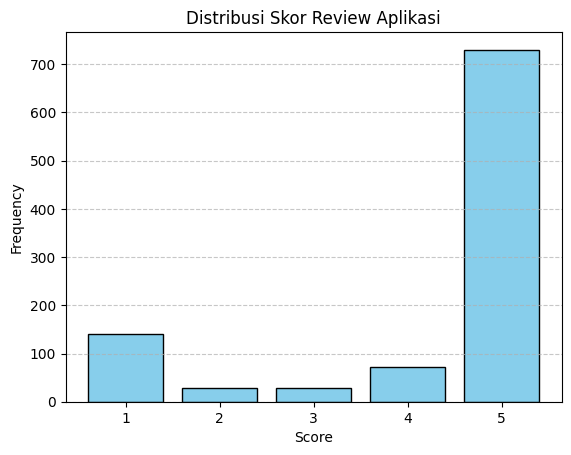

In [9]:
# Histogram skor 1–5
plt.hist(df2['score'], bins=[1, 2, 3, 4, 5, 6], align='left', rwidth=0.8, color='skyblue', edgecolor='black')
plt.xticks([1, 2, 3, 4, 5])  # Skor tetap integer
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Distribusi Skor Review Aplikasi")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [10]:
# Rangkuman statistik
df2.describe().loc[:, ['score']]

,score
count,1000.000000
mean,4.224000
std,1.444268
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


<Axes: xlabel='at'>

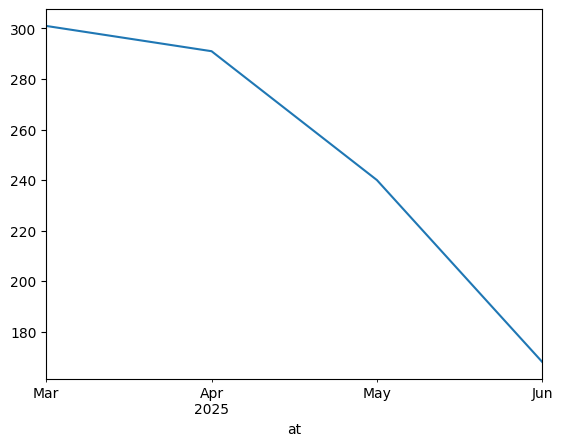

In [11]:
# Grafik jumlah review per bulan.
df['at'] = pd.to_datetime(df['at'])  # Pastikan format datetime
df.set_index('at').resample('ME').count()['reviewId'].plot()


### 3️⃣ **Tahapan Preprocessing**

In [12]:
# ✅ 1. Handling Missing Values → Menghapus atau mengisi data yang kosong  
print(df2.isnull().sum())

content    0
score      0
dtype: int64


In [13]:
# ✅ 2. Lowercasing → Mengubah seluruh teks menjadi huruf kecil  
df2['content_clean'] = df2['content'].astype(str).str.lower()
df2.head(5)

,content,score,content_clean
0,amazing,5,amazing
1,just getting started. but the interface is eas...,4,just getting started. but the interface is eas...
2,i bought the pro version for lifetime subscrip...,1,i bought the pro version for lifetime subscrip...
3,This app is good but I recomend running every ...,2,this app is good but i recomend running every ...
4,it very useful app plz download this app and l...,5,it very useful app plz download this app and l...


In [14]:
# ✅ 3. Expand Contraction → Mengubah bentuk singkatan menjadi bentuk lengkap (e.g., don't → do not)  
df2['content_clean'] = df2['content_clean'].apply(lambda x: contractions.fix(x))
df2.head(5)

,content,score,content_clean
0,amazing,5,amazing
1,just getting started. but the interface is eas...,4,just getting started. but the interface is eas...
2,i bought the pro version for lifetime subscrip...,1,i bought the pro version for lifetime subscrip...
3,This app is good but I recomend running every ...,2,this app is good but i recomend running every ...
4,it very useful app plz download this app and l...,5,it very useful app plz download this app and l...


In [15]:
# ✅ 4. Tokenisasi → Memisahkan teks menjadi daftar kata

# Inisialisasi tokenizer Treebank
tokenizer = TreebankWordTokenizer()

# Terapkan tokenisasi
df2['tokens'] = df2['content_clean'].apply(lambda x: tokenizer.tokenize(x))
df2.head(5)


,content,score,content_clean,tokens
0,amazing,5,amazing,[amazing]
1,just getting started. but the interface is eas...,4,just getting started. but the interface is eas...,"[just, getting, started., but, the, interface,..."
2,i bought the pro version for lifetime subscrip...,1,i bought the pro version for lifetime subscrip...,"[i, bought, the, pro, version, for, lifetime, ..."
3,This app is good but I recomend running every ...,2,this app is good but i recomend running every ...,"[this, app, is, good, but, i, recomend, runnin..."
4,it very useful app plz download this app and l...,5,it very useful app plz download this app and l...,"[it, very, useful, app, plz, download, this, a..."


In [16]:
# ✅ 5. Cabang token untuk VADER 
df2['tokens_vader'] = df2['tokens']

In [17]:
# Stopwords bawaan + custom domain-specific
stop_words = set(stopwords.words('english'))

# Tambahkan custom stopwords domain Play Store
custom_words = {
    'app', 'apps', 'application', 'play', 'store', 'installed', 'install',
    'downloading', 'download', 'device', 'phone', 'mobile', 'using', 'used',
    'google', 'work', 'mimo', 'hub', 'sphero', 'edu','sololearn','codecademy','go','working'  # opsional tergantung fokus topik
}
stop_words.update(custom_words)

# Terapkan stopword removal ke token yang sudah bebas tanda baca
df2['tokens_clean'] = df2['tokens'].apply(lambda tokens: [t for t in tokens if t not in stop_words])


In [18]:
def normalize_token(token):
    # Hapus spasi, simbol, dan karakter unicode aneh
    token = unicodedata.normalize('NFKD', token).encode('ascii', 'ignore').decode('utf-8')
    return token.strip()  # Hapus spasi atau newline

def is_alpha(token):
    return token.isalpha()

df2['tokens_clean'] = df2['tokens_clean'].apply(lambda tokens: [
    normalize_token(t).lower()
    for t in tokens
    if is_alpha(normalize_token(t).strip())
])

df2.head(5)

,content,score,content_clean,tokens,tokens_vader,tokens_clean
0,amazing,5,amazing,[amazing],[amazing],[amazing]
1,just getting started. but the interface is eas...,4,just getting started. but the interface is eas...,"[just, getting, started., but, the, interface,...","[just, getting, started., but, the, interface,...","[getting, interface, easy, great, beginners]"
2,i bought the pro version for lifetime subscrip...,1,i bought the pro version for lifetime subscrip...,"[i, bought, the, pro, version, for, lifetime, ...","[i, bought, the, pro, version, for, lifetime, ...","[bought, pro, version, lifetime, subscription,..."
3,This app is good but I recomend running every ...,2,this app is good but i recomend running every ...,"[this, app, is, good, but, i, recomend, runnin...","[this, app, is, good, but, i, recomend, runnin...","[good, recomend, running, every, code, taught,..."
4,it very useful app plz download this app and l...,5,it very useful app plz download this app and l...,"[it, very, useful, app, plz, download, this, a...","[it, very, useful, app, plz, download, this, a...","[useful, plz, learn, programming, thank]"


In [19]:
# Cek baris mana saja yang mengandung token 'nice' sebelum dibersihkan
df2[df2['tokens'].apply(lambda tokens: 'nice' in tokens)]


,content,score,content_clean,tokens,tokens_vader,tokens_clean
59,"Good learning app, easy to understand and it's...",5,"good learning app, easy to understand and it i...","[good, learning, app, ,, easy, to, understand,...","[good, learning, app, ,, easy, to, understand,...","[good, learning, easy, understand, nice]"
60,It's a nice app..,5,it is a nice app..,"[it, is, a, nice, app..]","[it, is, a, nice, app..]",[nice]
63,it's a really nice app for learning coding,5,it is a really nice app for learning coding,"[it, is, a, really, nice, app, for, learning, ...","[it, is, a, really, nice, app, for, learning, ...","[really, nice, learning, coding]"
80,nice,5,nice,[nice],[nice],[nice]
81,nice,5,nice,[nice],[nice],[nice]
...,...,...,...,...,...,...
869,very nice,5,very nice,"[very, nice]","[very, nice]",[nice]
876,Very nice,5,very nice,"[very, nice]","[very, nice]",[nice]
925,Nice 👍,5,nice 👍,"[nice, 👍]","[nice, 👍]",[nice]
987,Nice app,4,nice app,"[nice, app]","[nice, app]",[nice]


In [20]:
#✅ 8. Lemmatization
# Load model spaCy
nlp = spacy.load("en_core_web_sm")

# Fungsi lemmatizer menggunakan spaCy
def lemmatize_tokens(tokens):
    doc = nlp(" ".join(tokens))  # Gabungkan token ke dalam satu string untuk diproses
    return [token.lemma_ for token in doc]

# Lemmatisasi kolom 'tokens_clean'
df2['tokens_clean_lemma'] = df2['tokens_clean'].apply(lemmatize_tokens)
df2.head(5)


,content,score,content_clean,tokens,tokens_vader,tokens_clean,tokens_clean_lemma
0,amazing,5,amazing,[amazing],[amazing],[amazing],[amazing]
1,just getting started. but the interface is eas...,4,just getting started. but the interface is eas...,"[just, getting, started., but, the, interface,...","[just, getting, started., but, the, interface,...","[getting, interface, easy, great, beginners]","[get, interface, easy, great, beginner]"
2,i bought the pro version for lifetime subscrip...,1,i bought the pro version for lifetime subscrip...,"[i, bought, the, pro, version, for, lifetime, ...","[i, bought, the, pro, version, for, lifetime, ...","[bought, pro, version, lifetime, subscription,...","[buy, pro, version, lifetime, subscription, sa..."
3,This app is good but I recomend running every ...,2,this app is good but i recomend running every ...,"[this, app, is, good, but, i, recomend, runnin...","[this, app, is, good, but, i, recomend, runnin...","[good, recomend, running, every, code, taught,...","[good, recomend, run, every, code, teach, incl..."
4,it very useful app plz download this app and l...,5,it very useful app plz download this app and l...,"[it, very, useful, app, plz, download, this, a...","[it, very, useful, app, plz, download, this, a...","[useful, plz, learn, programming, thank]","[useful, plz, learn, program, thank]"


In [21]:
#✅ 9. Removing Rare Words (frekuensi < 3)

# Gabungkan semua token dari seluruh review menjadi satu list
all_clean_lemmas = [token for tokens in df2['tokens_clean_lemma'] for token in tokens]

# Hitung frekuensi kata
token_freq = Counter(all_clean_lemmas)

# Ambil kata-kata yang muncul ≥ 3 kali
min_freq = 3
valid_tokens = set([token for token, freq in token_freq.items() if freq >= min_freq])

# Hapus token yang tidak termasuk dalam set valid_tokens
df2['tokens_clean_final'] = df2['tokens_clean_lemma'].apply(lambda tokens: [t for t in tokens if t in valid_tokens])
df2.head()


,content,score,content_clean,tokens,tokens_vader,tokens_clean,tokens_clean_lemma,tokens_clean_final
0,amazing,5,amazing,[amazing],[amazing],[amazing],[amazing],[amazing]
1,just getting started. but the interface is eas...,4,just getting started. but the interface is eas...,"[just, getting, started., but, the, interface,...","[just, getting, started., but, the, interface,...","[getting, interface, easy, great, beginners]","[get, interface, easy, great, beginner]","[get, interface, easy, great, beginner]"
2,i bought the pro version for lifetime subscrip...,1,i bought the pro version for lifetime subscrip...,"[i, bought, the, pro, version, for, lifetime, ...","[i, bought, the, pro, version, for, lifetime, ...","[bought, pro, version, lifetime, subscription,...","[buy, pro, version, lifetime, subscription, sa...","[buy, pro, version, lifetime, subscription, se..."
3,This app is good but I recomend running every ...,2,this app is good but i recomend running every ...,"[this, app, is, good, but, i, recomend, runnin...","[this, app, is, good, but, i, recomend, runnin...","[good, recomend, running, every, code, taught,...","[good, recomend, run, every, code, teach, incl...","[good, run, every, code, teach, one, show, tho..."
4,it very useful app plz download this app and l...,5,it very useful app plz download this app and l...,"[it, very, useful, app, plz, download, this, a...","[it, very, useful, app, plz, download, this, a...","[useful, plz, learn, programming, thank]","[useful, plz, learn, program, thank]","[useful, learn, program, thank]"


In [22]:
# ✅ 10. Handling Missing Values → Menghapus data yang kosong 

print("Jumlah baris SEBELUM pembersihan:", len(df2))

# Hapus baris jika kolom 'tokens' kosong (NaN atau [])
df2 = df2[~df2['tokens_clean_final'].isnull()]                            # Hapus jika NaN
df2 = df2[df2['tokens_clean_final'].apply(lambda x: len(x) > 0)]          # Hapus jika list kosong []

# Reset index agar rapi (opsional)
df2 = df2.reset_index(drop=True)

# Tampilkan jumlah baris setelah pembersihan
print("Jumlah baris SESUDAH pembersihan:", len(df2))

Jumlah baris SEBELUM pembersihan: 1000
Jumlah baris SESUDAH pembersihan: 959


### 4️⃣ **Cek Sentiment Analysis - Textblob**

In [23]:
# Hitung sentimen dengan aman menggunakan .loc
df2.loc[:, 'sentiment_polarity'] = df2['tokens_clean_final'].apply(lambda tokens: TextBlob(" ".join(tokens)).sentiment.polarity)
df2.loc[:, 'sentiment_subjective'] = df2['tokens_clean_final'].apply(lambda tokens: TextBlob(" ".join(tokens)).sentiment.subjectivity)

In [24]:
#Add a column name polarity_rating from changing the score of the review into 3 labels: Pos, Negative Neutral
df2['sentiment_rating'] = df2['score'].apply(lambda x: 'positive' if x > 3 else('neutral' if x == 3  else 'negative'))

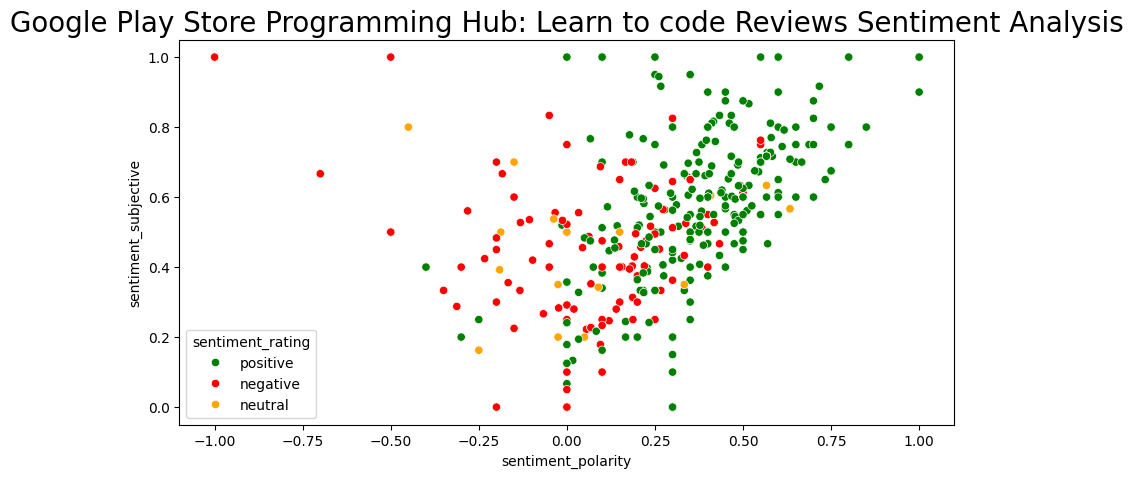

In [25]:
# Mapping warna manual untuk hue
custom_palette = {
    'positive': 'green',
    'neutral': 'orange',
    'negative': 'red'
}

plt.figure(figsize=(10, 5))
sns.scatterplot(
    x='sentiment_polarity',
    y='sentiment_subjective',
    hue='sentiment_rating',
    data=df2,
    edgecolor='white',
    palette=custom_palette
)
plt.title("Google Play Store Programming Hub: Learn to code Reviews Sentiment Analysis", fontsize=20)
plt.show()


In [26]:
# Hitung jumlah masing-masing kategori
rating_counts = df2['sentiment_rating'].value_counts().reindex(['positive', 'neutral', 'negative'], fill_value=0)

# Tampilkan jumlah frekuensinya
print("📊 Jumlah Review per Kategori Berdasarkan Score:")
for sentiment, count in rating_counts.items():
    print(f"- {sentiment:<8}: {count} review")

📊 Jumlah Review per Kategori Berdasarkan Score:
- positive: 765 review
- neutral : 27 review
- negative: 167 review


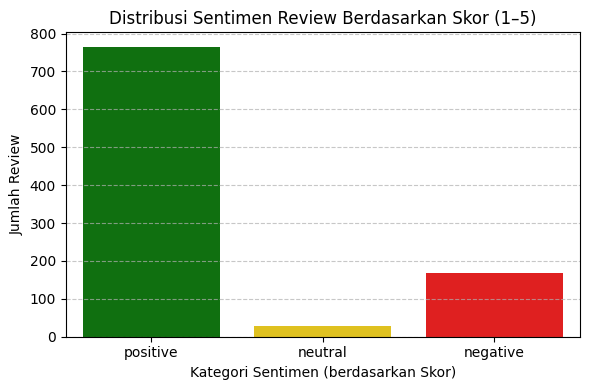

In [27]:
# Siapkan DataFrame untuk visualisasi
rating_df = rating_counts.reset_index()
rating_df.columns = ['sentiment', 'count']

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(
    data=rating_df,
    x='sentiment',
    y='count',
    hue='sentiment',
    palette={'positive': 'green', 'neutral': 'gold', 'negative': 'red'},
    legend=False
)

plt.xlabel("Kategori Sentimen (berdasarkan Skor)")
plt.ylabel("Jumlah Review")
plt.title("Distribusi Sentimen Review Berdasarkan Skor (1–5)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

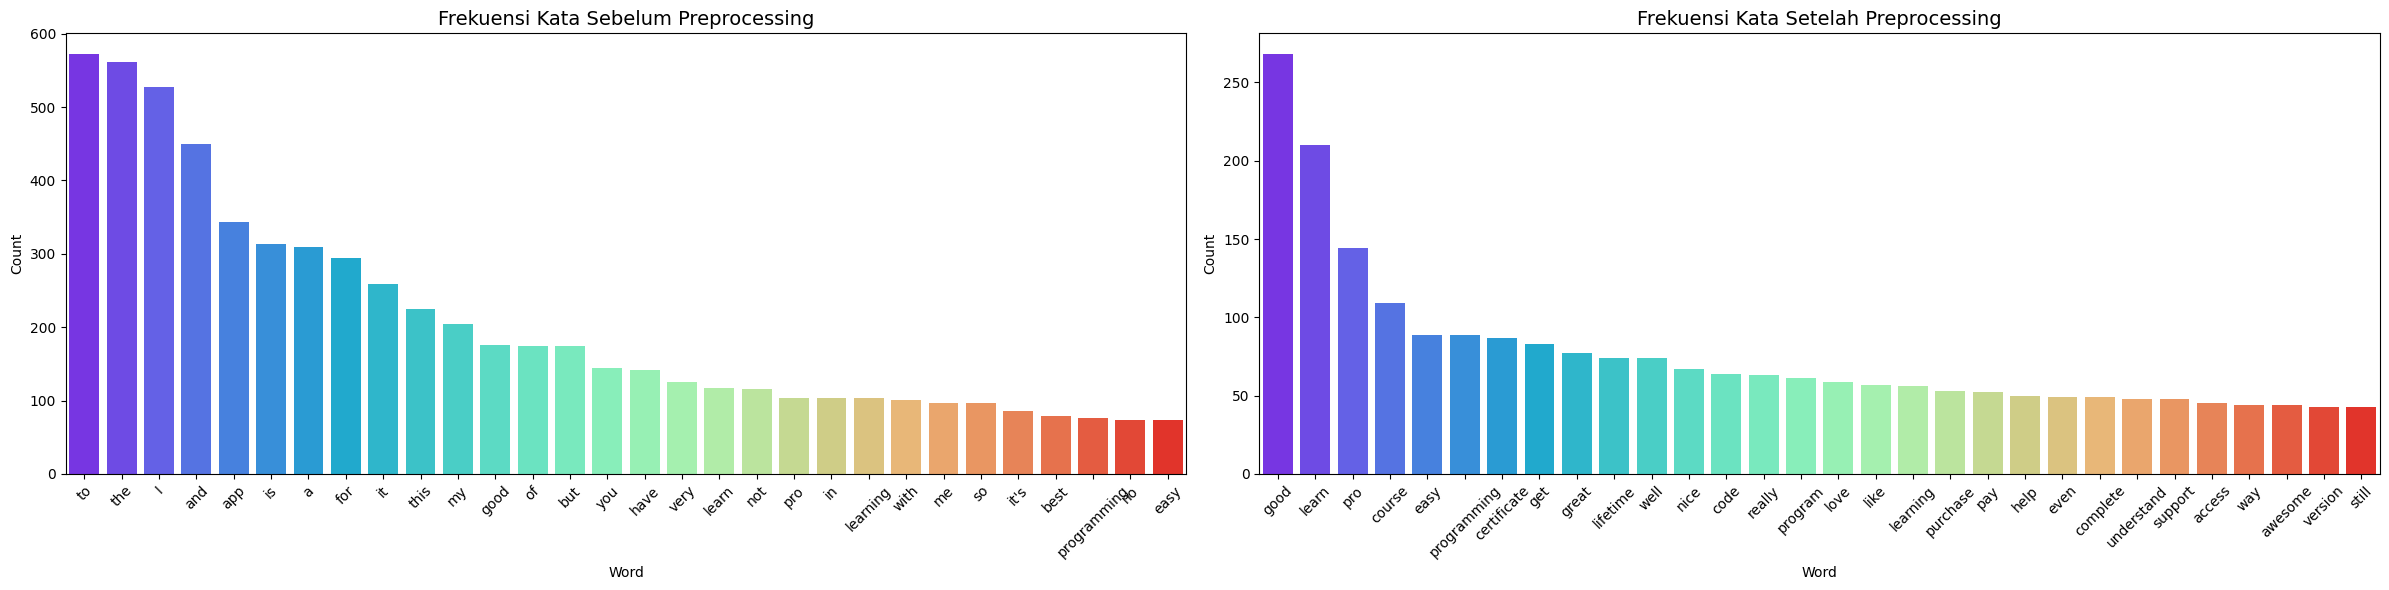

In [28]:
# Fungsi untuk visualisasi frekuensi kata
def freq_words(ax, text_series, terms=30, title="Frekuensi Kata"):
    all_words = ' '.join([text for text in text_series])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word': list(fdist.keys()), 'count': list(fdist.values())})
    top_words = words_df.nlargest(columns="count", n=terms)
    
    sns.barplot(data=top_words, x="word", y="count", hue="word", palette="rainbow", legend=False, ax=ax)
    ax.set_title(title, fontsize=14)
    ax.set_ylabel("Count")
    ax.set_xlabel("Word")
    ax.tick_params(axis='x', rotation=45)

# Pastikan tidak ada nilai NaN
df2['content'] = df2['content'].fillna('').astype(str)

# Gabungkan token menjadi string untuk versi "after"
df2['clean_text_final'] = df2['tokens_clean_final'].apply(lambda tokens: ' '.join(tokens))

# Buat 2 subplots untuk before & after
fig, axes = plt.subplots(1, 2, figsize=(24, 6))

# Ganti judul tanpa emoji
freq_words(axes[0], df2['content'], title="Frekuensi Kata Sebelum Preprocessing")
freq_words(axes[1], df2['clean_text_final'], title="Frekuensi Kata Setelah Preprocessing")

plt.tight_layout()
plt.show()

### 5️⃣ **Cek Sentiment Analysis - Vader**

In [29]:
# Unduh lexicon VADER jika belum
# nltk.download('vader_lexicon')

# Inisialisasi analyzer
vader_analyzer = SentimentIntensityAnalyzer()

In [30]:
df_vader = df2[['tokens_vader']].copy()
# Gabungkan token menjadi kalimat
df_vader['text'] = df_vader['tokens_vader'].apply(lambda tokens: ' '.join(tokens))

df_vader.head(5)

,tokens_vader,text
0,[amazing],amazing
1,"[just, getting, started., but, the, interface,...",just getting started. but the interface is eas...
2,"[i, bought, the, pro, version, for, lifetime, ...",i bought the pro version for lifetime subscrip...
3,"[this, app, is, good, but, i, recomend, runnin...",this app is good but i recomend running every ...
4,"[it, very, useful, app, plz, download, this, a...",it very useful app plz download this app and l...


In [31]:
# Fungsi untuk mengembalikan skor dari VADER
def get_vader_scores(text):
    return vader_analyzer.polarity_scores(text)

# Hitung skor dan ubah jadi kolom DataFrame
vader_scores = df_vader['text'].apply(get_vader_scores).apply(pd.Series)
df_vader = pd.concat([df_vader, vader_scores], axis=1)

In [32]:
# Kategorikan Sentimen
def categorize_sentiment(compound):
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df_vader['vader_sentiment'] = df_vader['compound'].apply(categorize_sentiment)

In [33]:
df_vader.head(5)

,tokens_vader,text,neg,neu,pos,compound,vader_sentiment
0,[amazing],amazing,0.000,0.000,1.000,0.5859,positive
1,"[just, getting, started., but, the, interface,...",just getting started. but the interface is eas...,0.000,0.537,0.463,0.8885,positive
2,"[i, bought, the, pro, version, for, lifetime, ...",i bought the pro version for lifetime subscrip...,0.000,1.000,0.000,0.0000,neutral
3,"[this, app, is, good, but, i, recomend, runnin...",this app is good but i recomend running every ...,0.063,0.746,0.192,0.8126,positive
4,"[it, very, useful, app, plz, download, this, a...",it very useful app plz download this app and l...,0.000,0.623,0.377,0.7397,positive


In [34]:
# Hitung jumlah masing-masing kategori sentimen
sentiment_counts = df_vader['vader_sentiment'].value_counts().reindex(['positive', 'neutral', 'negative'], fill_value=0)

# Tampilkan frekuensi
print("📊 Jumlah Review per Kategori Sentimen (VADER):")
for sentiment, count in sentiment_counts.items():
    print(f"- {sentiment.capitalize():<8}: {count} review")

📊 Jumlah Review per Kategori Sentimen (VADER):
- Positive: 795 review
- Neutral : 73 review
- Negative: 91 review


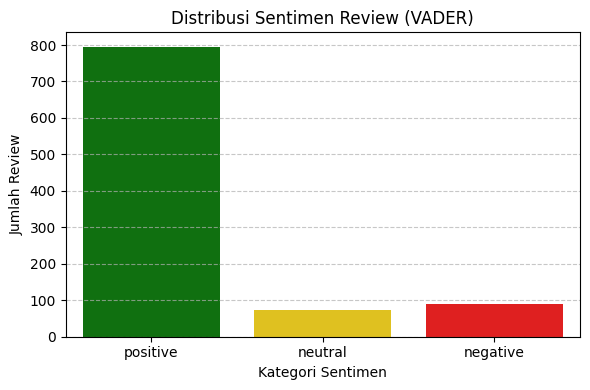

In [35]:
# Siapkan DataFrame untuk visualisasi
sentiment_df = sentiment_counts.reset_index()
sentiment_df.columns = ['sentiment', 'count']

# Buat barplot
plt.figure(figsize=(6, 4))
sns.barplot(
    data=sentiment_df,
    x='sentiment',
    y='count',
    hue='sentiment',
    palette={'positive': 'green', 'neutral': 'gold', 'negative': 'red'},
    legend=False
)

plt.xlabel("Kategori Sentimen")
plt.ylabel("Jumlah Review")
plt.title("Distribusi Sentimen Review (VADER)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [36]:
# Gabungkan kolom ke dalam satu DataFrame
df_compare = df2[['score', 'sentiment_rating']].copy()
df_compare['vader_sentiment'] = df_vader['vader_sentiment']

In [37]:
# Hitung jumlah masing-masing kombinasi kategori
compare_counts = df_compare.groupby(['sentiment_rating', 'vader_sentiment']).size().unstack(fill_value=0)
print("📊 Tabel Perbandingan Sentimen (Score vs VADER):\n")
print(compare_counts)

📊 Tabel Perbandingan Sentimen (Score vs VADER):

vader_sentiment   negative  neutral  positive
sentiment_rating                             
negative                65       25        77
neutral                  7        9        11
positive                19       39       707


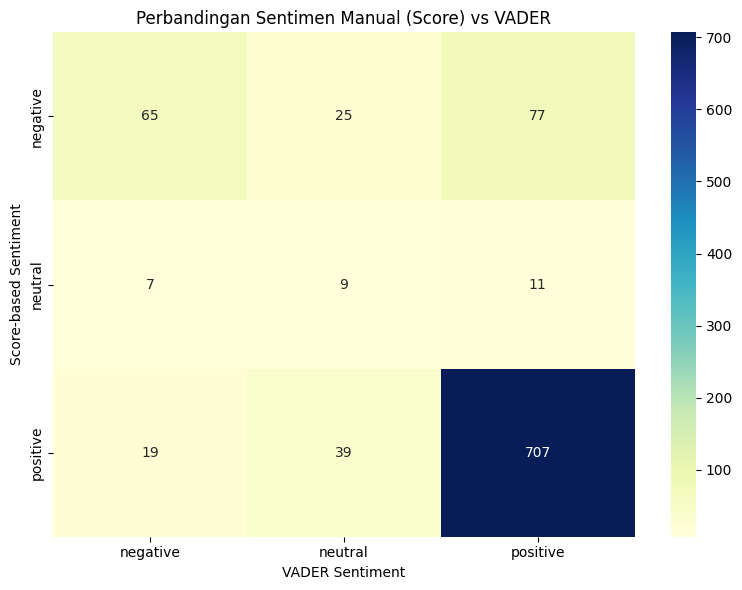

In [38]:
plt.figure(figsize=(8, 6))
sns.heatmap(compare_counts, annot=True, fmt='d', cmap='YlGnBu')

plt.title("Perbandingan Sentimen Manual (Score) vs VADER")
plt.xlabel("VADER Sentiment")
plt.ylabel("Score-based Sentiment")
plt.tight_layout()
plt.show()

In [39]:
# Buat kolom baru untuk mengecek apakah label cocok
df_compare['sentiment_match'] = df_compare['sentiment_rating'].str.lower() == df_compare['vader_sentiment']

total_reviews = len(df_compare)
matched = df_compare['sentiment_match'].sum()
accuracy = matched / total_reviews
print(f"✅ Total review         : {total_reviews}")
print(f"✅ Jumlah yang cocok    : {matched}")
print(f"📊 Akurasi Kesesuaian   : {accuracy:.2%}")


✅ Total review         : 959
✅ Jumlah yang cocok    : 781
📊 Akurasi Kesesuaian   : 81.44%


### 6️⃣ **Topic Modelling**

In [ ]:
def display_labeled_topics(model, feature_names, topic_labels=None, no_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        top_features = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        if topic_labels is not None:
            label = topic_labels.get(topic_idx, f"Topik {topic_idx + 1}")
        else:
            label = f"Topik {topic_idx + 1}"
        print(f"\n🧠 {label}")
        print("🔑 Kata Kunci:", ", ".join(top_features))
        
# Fungsi untuk memproses dan tampilkan topik dari subset data
def topic_modeling_by_sentiment(df, label, topic_labels=None, n_topics=5, no_top_words=10):
    print(f"\n===== 🔍 Topik untuk Sentimen: {label.upper()} =====")

    df = df.copy()
    df['clean_text_final'] = df['tokens_clean_final'].apply(lambda tokens: ' '.join(tokens))

    tfidf_vectorizer = TfidfVectorizer(
        max_df=0.95,
        min_df=2,
        ngram_range=(1, 2)
    )
    X_tfidf = tfidf_vectorizer.fit_transform(df['clean_text_final'])

    nmf_model = NMF(n_components=n_topics, random_state=42)
    topic_distribution = nmf_model.fit_transform(X_tfidf)

    tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
    display_labeled_topics(nmf_model, tfidf_feature_names, topic_labels, no_top_words)

    # Tambahkan kolom dominan topik
    df['dominant_topic'] = topic_distribution.argmax(axis=1)
    df['dominant_topic_display'] = df['dominant_topic'] + 1  # 1-based

    return df



In [ ]:
# Pisahkan dataset berdasarkan sentimen
df_modelling = df2[['tokens_clean_final', 'sentiment_rating']].copy()
sentiment_labels = ['positive', 'negative', 'neutral']  # Sesuaikan dengan label yang kamu pakai

In [ ]:
# Jalankan topic modeling per kelompok sentimen
for label in sentiment_labels:
    df_sentiment = df_modelling[df_modelling['sentiment_rating'] == label]
    if not df_sentiment.empty:
        topic_modeling_by_sentiment(df_sentiment, label, n_topics=5, no_top_words=10)


===== 🔍 Topik untuk Sentimen: POSITIVE =====

🧠 Topik 1
🔑 Kata Kunci: good, far good, far, learning, beginner, good learning, good learn, free, good beginner, good practice

🧠 Topik 2
🔑 Kata Kunci: great, great learning, learning, great learn, great practice, practice, thank, great way, great platform, platform

🧠 Topik 3
🔑 Kata Kunci: nice, practice, nice learn, nice practice, review, nice one, really nice, language, much, keep

🧠 Topik 4
🔑 Kata Kunci: love, learning, make, really, practice, learn love, it, academy, far, love it

🧠 Topik 5
🔑 Kata Kunci: well, learn, code, learn code, way, amazing, well learn, way learn, excellent, great learn

===== 🔍 Topik untuk Sentimen: NEGATIVE =====

🧠 Topik 1
🔑 Kata Kunci: course, review, well, use, website, question, practice, learn, want, like

🧠 Topik 2
🔑 Kata Kunci: good, learn, way, nothing, programming, change, experience, basic, though, even

🧠 Topik 3
🔑 Kata Kunci: login, account, log, github, create, even, even login, error, get, log g

In [ ]:
# Mapping topik ke label tematik
positive_topic_labels = {
    0: "Topik 1 - Pengalaman Awal yang Baik bagi Pemula",
    1: "Topik 2 - Apresiasi terhadap Metode & Platform Belajar",
    2: "Topik 3 - Review Singkat yang Positif dan Ringan",
    3: "Topik 4 - Kecintaan dan Loyalitas terhadap CodeCademy",
    4: "Topik 5 - Cara Belajar Koding yang Efektif & Menarik"
}
negative_topic_labels = {
    0: "Topik 1 - Kritik terhadap Struktur Pembelajaran",
    1: "Topik 2 - Pengalaman Belajar yang Tidak Memuaskan",
    2: "Topik 3 - Masalah Teknis Autentikasi",
    3: "Topik 4 - Kritik terhadap Versi Web & UI",
    4: "Topik 5 - Keluhan Kegagalan Akses Akun"
}
neutral_topic_labels = {
    0: "Topik 1 - Ulasan Netral tentang Konten & Interface",
    1: "Topik 2 - Harapan terhadap Fitur atau Model Pembayaran",
    2: "Topik 3 - Evaluasi Materi & Latihan",
    3: "Topik 4 - Catatan Penggunaan Fitur Aplikasi",
    4: "Topik 5 - Pengalaman Biasa dengan Sedikit Masalah"
}

In [ ]:
# Siapkan mapping topik per sentimen
sentiment_topic_mappings = {
    'positive': positive_topic_labels,
    'negative': negative_topic_labels,
    'neutral': neutral_topic_labels
}

# Inisialisasi DataFrame akhir
final_topic_df = pd.DataFrame()

# Jalankan topic modeling per sentimen dan gabungkan hasil
for label in sentiment_labels:
    df_sentiment = df_modelling[df_modelling['sentiment_rating'] == label].copy()
    
    if not df_sentiment.empty:
        topic_labels = sentiment_topic_mappings.get(label)
        df_with_topics = topic_modeling_by_sentiment(df_sentiment, label, topic_labels=topic_labels, n_topics=5, no_top_words=10)
        
        # Tambahkan kolom label topik tematik
        df_with_topics['jenis_topik'] = df_with_topics['dominant_topic'].map(topic_labels)

        # Gabungkan ke tabel akhir
        final_topic_df = pd.concat([final_topic_df, df_with_topics], ignore_index=True)


===== 🔍 Topik untuk Sentimen: POSITIVE =====

🧠 Topik 1 - Pengalaman Awal yang Baik bagi Pemula
🔑 Kata Kunci: good, far good, far, learning, beginner, good learning, good learn, free, good beginner, good practice

🧠 Topik 2 - Apresiasi terhadap Metode & Platform Belajar
🔑 Kata Kunci: great, great learning, learning, great learn, great practice, practice, thank, great way, great platform, platform

🧠 Topik 3 - Review Singkat yang Positif dan Ringan
🔑 Kata Kunci: nice, practice, nice learn, nice practice, review, nice one, really nice, language, much, keep

🧠 Topik 4 - Kecintaan dan Loyalitas terhadap CodeCademy
🔑 Kata Kunci: love, learning, make, really, practice, learn love, it, academy, far, love it

🧠 Topik 5 - Cara Belajar Koding yang Efektif & Menarik
🔑 Kata Kunci: well, learn, code, learn code, way, amazing, well learn, way learn, excellent, great learn

===== 🔍 Topik untuk Sentimen: NEGATIVE =====

🧠 Topik 1 - Kritik terhadap Struktur Pembelajaran
🔑 Kata Kunci: course, review, w


===== 🔍 Topik untuk Sentimen: POSITIVE =====

🧠 Topik 1 - Pengalaman Awal yang Baik bagi Pemula
🔑 Kata Kunci: good, far good, far, learning, beginner, good learning, good learn, free, good beginner, good practice

🧠 Topik 2 - Apresiasi terhadap Metode & Platform Belajar
🔑 Kata Kunci: great, great learning, learning, great learn, great practice, practice, thank, great way, great platform, platform

🧠 Topik 3 - Review Singkat yang Positif dan Ringan
🔑 Kata Kunci: nice, practice, nice learn, nice practice, review, nice one, really nice, language, much, keep

🧠 Topik 4 - Kecintaan dan Loyalitas terhadap CodeCademy
🔑 Kata Kunci: love, learning, make, really, practice, learn love, it, academy, far, love it

🧠 Topik 5 - Cara Belajar Koding yang Efektif & Menarik
🔑 Kata Kunci: well, learn, code, learn code, way, amazing, well learn, way learn, excellent, great learn


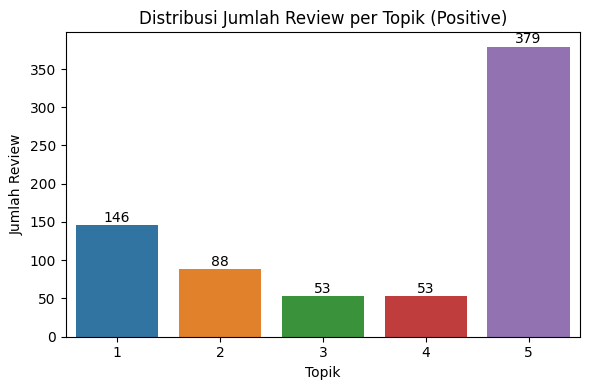

In [ ]:
# Contoh: visualisasi untuk sentimen positif
label = 'positive'
df_sentiment = df_modelling[df_modelling['sentiment_rating'] == label]

if not df_sentiment.empty:
    df_with_topic = topic_modeling_by_sentiment(
        df_sentiment,
        label,
        topic_labels=positive_topic_labels,
        n_topics=5,
        no_top_words=10
    )

    # Plot distribusi topik
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(
        x='dominant_topic_display',
        hue='dominant_topic_display',
        data=df_with_topic,
        palette='tab10',
        legend=False
    )
    plt.title(f"Distribusi Jumlah Review per Topik ({label.capitalize()})")
    plt.xlabel("Topik")
    plt.ylabel("Jumlah Review")
    plt.xticks(rotation=0)
    plt.tight_layout()

    # Tambahkan label jumlah di atas batang
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.text(
                x=p.get_x() + p.get_width() / 2,
                y=height + 0.5,
                s=f'{int(height)}',
                ha='center',
                va='bottom'
            )

    plt.show()


===== 🔍 Topik untuk Sentimen: NEGATIVE =====

🧠 Topik 1 - Kritik terhadap Struktur Pembelajaran
🔑 Kata Kunci: course, review, well, use, website, question, practice, learn, want, like

🧠 Topik 2 - Pengalaman Belajar yang Tidak Memuaskan
🔑 Kata Kunci: good, learn, way, nothing, programming, change, experience, basic, though, even

🧠 Topik 3 - Masalah Teknis Autentikasi
🔑 Kata Kunci: login, account, log, github, create, even, even login, error, get, log github

🧠 Topik 4 - Kritik terhadap Versi Web & UI
🔑 Kata Kunci: web, sync, web version, version, terrible, ui, instead, really, site, nice

🧠 Topik 5 - Keluhan Kegagalan Akses Akun
🔑 Kata Kunci: sign, try sign, try, let, sign github, unable sign, let sign, account, impossible, crash


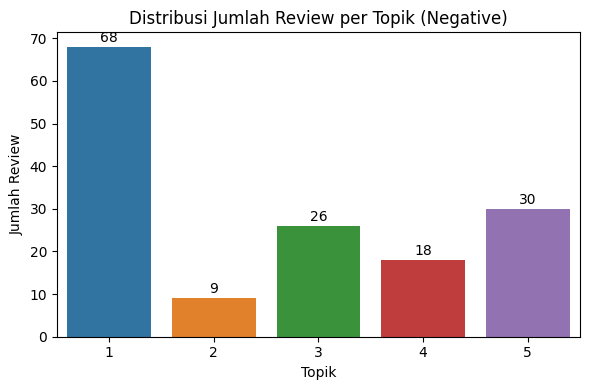

In [ ]:
# Contoh: visualisasi untuk sentimen negative
label = 'negative'
df_sentiment = df_modelling[df_modelling['sentiment_rating'] == label]

if not df_sentiment.empty:
    df_with_topic = topic_modeling_by_sentiment(
        df_sentiment,
        label,
        topic_labels=negative_topic_labels,
        n_topics=5,
        no_top_words=10
    )

    # Plot distribusi topik
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(
        x='dominant_topic_display',
        hue='dominant_topic_display',
        data=df_with_topic,
        palette='tab10',
        legend=False
    )
    plt.title(f"Distribusi Jumlah Review per Topik ({label.capitalize()})")
    plt.xlabel("Topik")
    plt.ylabel("Jumlah Review")
    plt.xticks(rotation=0)
    plt.tight_layout()

    # Tambahkan label jumlah di atas batang
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.text(
                x=p.get_x() + p.get_width() / 2,
                y=height + 0.5,
                s=f'{int(height)}',
                ha='center',
                va='bottom'
            )

    plt.show()


===== 🔍 Topik untuk Sentimen: NEUTRAL =====

🧠 Topik 1 - Ulasan Netral tentang Konten & Interface
🔑 Kata Kunci: good, learn, helpful, content, thing, one, ui, computer, suppose, hard learn

🧠 Topik 2 - Harapan terhadap Fitur atau Model Pembayaran
🔑 Kata Kunci: like, would, would like, like see, see, plan, pay, learning, great, able

🧠 Topik 3 - Evaluasi Materi & Latihan
🔑 Kata Kunci: course, need, practice, code, lesson, learn, computer, nice, practice lesson, could

🧠 Topik 4 - Catatan Penggunaan Fitur Aplikasi
🔑 Kata Kunci: get, course, much, keep, version, want, feel like, one, little, ui

🧠 Topik 5 - Pengalaman Biasa dengan Sedikit Masalah
🔑 Kata Kunci: pretty, cool, multiple, practice, still, web version, web, version, make, problem


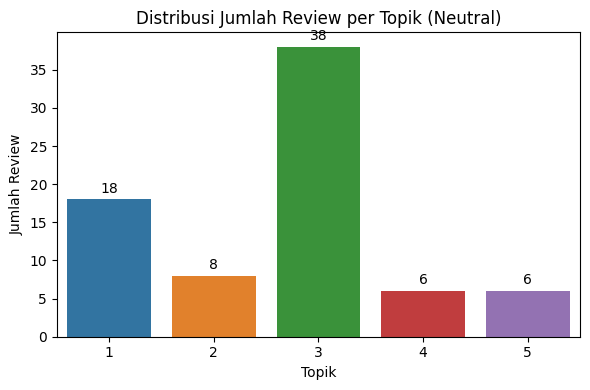

In [ ]:
# Contoh: visualisasi untuk sentimen negative
label = 'neutral'
df_sentiment = df_modelling[df_modelling['sentiment_rating'] == label]

if not df_sentiment.empty:
    df_with_topic = topic_modeling_by_sentiment(
        df_sentiment,
        label,
        topic_labels=neutral_topic_labels,
        n_topics=5,
        no_top_words=10
    )

    # Plot distribusi topik
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(
        x='dominant_topic_display',
        hue='dominant_topic_display',
        data=df_with_topic,
        palette='tab10',
        legend=False
    )
    plt.title(f"Distribusi Jumlah Review per Topik ({label.capitalize()})")
    plt.xlabel("Topik")
    plt.ylabel("Jumlah Review")
    plt.xticks(rotation=0)
    plt.tight_layout()

    # Tambahkan label jumlah di atas batang
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.text(
                x=p.get_x() + p.get_width() / 2,
                y=height + 0.5,
                s=f'{int(height)}',
                ha='center',
                va='bottom'
            )

    plt.show()

In [ ]:
final_topic_df.head()

,tokens_clean_final,sentiment_rating,clean_text_final,dominant_topic,dominant_topic_display,jenis_topik
0,[good],positive,good,0,1,Topik 1 - Pengalaman Awal yang Baik bagi Pemula
1,"[good, platform, recommend]",positive,good platform recommend,0,1,Topik 1 - Pengalaman Awal yang Baik bagi Pemula
2,"[good, study]",positive,good study,0,1,Topik 1 - Pengalaman Awal yang Baik bagi Pemula
3,[nice],positive,nice,2,3,Topik 3 - Review Singkat yang Positif dan Ringan
4,[awesome],positive,awesome,4,5,Topik 5 - Cara Belajar Koding yang Efektif & M...


### 7️⃣ **Penggabungan Data Hasil Review**

In [ ]:
# Pastikan indexnya sejajar dan urutan review konsisten
df_final = pd.concat([
    df2[['content', 'score', 'sentiment_rating']].reset_index(drop=True),
    df_vader[['vader_sentiment']].reset_index(drop=True),
    final_topic_df[['jenis_topik']].reset_index(drop=True)
], axis=1)

In [ ]:
df_final.head(5)

,content,score,sentiment_rating,vader_sentiment,jenis_topik
0,Good,5,positive,positive,Topik 1 - Pengalaman Awal yang Baik bagi Pemula
1,best platform recommended,5,positive,positive,Topik 1 - Pengalaman Awal yang Baik bagi Pemula
2,it is good apk for studying,5,positive,positive,Topik 1 - Pengalaman Awal yang Baik bagi Pemula
3,nice,4,positive,positive,Topik 3 - Review Singkat yang Positif dan Ringan
4,Awesome 👌,5,positive,positive,Topik 5 - Cara Belajar Koding yang Efektif & M...


In [61]:
output_path = "../data/review_final_programming_hub.xlsx"
df_final.to_excel(output_path, index=False)
print(f"✅ Data berhasil disimpan ke {output_path}")

✅ Data berhasil disimpan ke ../data/review_final_programming_hub.xlsx
